In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Extracting features
def extract_features(file_path):
    with open(file_path, 'rb') as file:
        X, sample_rate = librosa.load(file, sr=None, mono=True)
        stft = np.abs(librosa.stft(X))#fourier transformation
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)#extract multiple features
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)#tonal content
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)#spectrography of the ft
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)#decibel difference between peaks and valleys
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)#harmonic changes and tones
    return np.hstack([mfccs,chroma,mel,contrast,tonnetz])

# Loading data and extracting features
def load_data(data_path):
    features = []
    labels = []
    # Loop through all subdirectories in data path
    for dir_name in os.listdir(data_path):
        sub_dir_path = os.path.join(data_path, dir_name)
        file_count=0
        # Loop through all audio files in subdirectory
        for file_name in os.listdir(sub_dir_path):
            if file_count>24:
              continue
            file_path = os.path.join(sub_dir_path, file_name)
            print(file_path)
            file_features = extract_features(file_path)
            features.append(file_features)
            labels.append(dir_name)
            file_count+=1
    features = np.array(features)
    labels = np.array(labels)
    return features, labels

# Load data and extract features
data_path = '/content/drive/MyDrive/Data/Data/genres_original'
features, labels = load_data(data_path)



/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00007.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00004.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00001.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00006.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00000.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00002.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00005.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00003.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00021.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00020.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00019.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00014.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00011.wav
/content/drive/MyDrive/Data/Data/genres_original/blues/blues.00008.wav
/conte

In [ ]:
import numpy as np
features2 = np.load('/content/drive/MyDrive/gtzandata1.npy')
labels2 = np.load('/content/drive/MyDrive/gtzandata2.npy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
print('Accuracy:', svm_accuracy)

Accuracy: 0.74


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,classification_report

# Create pipeline with preprocessing and SVM model
svm_pipeline = make_pipeline(
    StandardScaler(), # standardize features
    SVC(kernel='rbf', C=10, gamma=0.01, random_state=42) # SVM model with RBF kernel
)

# Define hyperparameters to tune with GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10], # regularization parameter
    'svc__gamma': [0.001, 0.01, 0.1], # kernel coefficient for 'rbf' kernel
}

# Use GridSearchCV to find best hyperparameters
svm_grid = GridSearchCV(svm_pipeline, param_grid=param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Fit SVM model with best hyperparameters
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train, y_train)

# Predict labels for test data and evaluate accuracy
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test,y_pred_svm, average="macro")
print('Accuracy:', svm_accuracy)
print("Precision:", svm_precision)
dt_report = classification_report(y_test, y_pred_svm)
print(dt_report)

Accuracy: 0.8367346938775511
Precision: 0.8514285714285714
              precision    recall  f1-score   support

       blues       0.67      1.00      0.80         4
   classical       1.00      1.00      1.00         8
     country       0.71      0.83      0.77         6
       disco       1.00      1.00      1.00         4
      hiphop       0.80      0.67      0.73         6
        jazz       0.83      0.83      0.83         6
       metal       1.00      1.00      1.00         2
         pop       0.75      1.00      0.86         3
      reggae       1.00      0.60      0.75         5
        rock       0.75      0.60      0.67         5

    accuracy                           0.84        49
   macro avg       0.85      0.85      0.84        49
weighted avg       0.85      0.84      0.83        49



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,classification_report
from sklearn.ensemble import IsolationForest
import numpy as np

# Set a random seed for reproducibility
random_seed = 86
np.random.seed(random_seed)

# Define the scaling methods
scaling_methods = [MaxAbsScaler(), Normalizer()]

# Select the specific iteration with the best accuracy where n_neighbors = 2
best_iteration = {
    'Scaling Methods': ['MaxAbsScaler', 'Normalizer'],
    'Metric': 'manhattan',
    'Weights': 'uniform',
    'n_neighbors': 4
}

# Apply scaling methods one after the other on the entire dataset
X_scaled = np.copy(features2)
for scaler_name in best_iteration['Scaling Methods']:
    scaler = [scaler for scaler in scaling_methods if scaler.__class__.__name__ == scaler_name][0]
    X_scaled = scaler.fit_transform(X_scaled)

# Apply outlier detection using Isolation Forest
outlier_detector = IsolationForest(random_state=random_seed)
outliers = outlier_detector.fit_predict(X_scaled)
X_no_outliers = X_scaled[outliers == 1]
y_no_outliers = labels2[outliers == 1]

# Split the scaled and outlier-filtered dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=random_seed)

# Create the KNN classifier with the specified hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=best_iteration['n_neighbors'],
    weights=best_iteration['Weights'],
    metric=best_iteration['Metric']
)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average = "macro")

# Print the accuracy

print("Accuracy:", accuracy)
print("Precision:", precision)
dt_report = classification_report(y_test, y_pred_knn)
print(dt_report)

Accuracy: 0.8367346938775511
Precision: 0.868888888888889
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00         4
   classical       0.89      1.00      0.94         8
     country       1.00      0.83      0.91         6
       disco       0.80      1.00      0.89         4
      hiphop       0.75      1.00      0.86         6
        jazz       1.00      0.83      0.91         6
       metal       1.00      1.00      1.00         2
         pop       1.00      0.33      0.50         3
      reggae       0.50      0.60      0.55         5
        rock       0.75      0.60      0.67         5

    accuracy                           0.84        49
   macro avg       0.87      0.82      0.82        49
weighted avg       0.86      0.84      0.83        49



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
lr = LogisticRegression(max_iter=10000)

# Fit the model to the scaled training data
lr.fit(X_train_scaled, y_train)

# Predict labels for the scaled test data
y_pred_lr = lr.predict(X_test_scaled)

# Calculate the accuracy of the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Perform hyperparameter tuning to find the best parameters
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and fit the model with them
best_lr = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Predict labels for the test data using the best model
y_pred_best_lr = best_lr.predict(X_test_scaled)

# Calculate the accuracy of the best model
best_lr_accuracy = accuracy_score(y_test, y_pred_best_lr)
precision = precision_score(y_test, y_pred_best_lr, average = "macro")


print('Accuracy:', best_lr_accuracy)
print("Precision:", precision)
dt_report = classification_report(y_test, y_pred_svm)
print(dt_report)

Accuracy: 0.7346938775510204
Precision: 0.7525
              precision    recall  f1-score   support

       blues       0.67      1.00      0.80         4
   classical       1.00      1.00      1.00         8
     country       0.71      0.83      0.77         6
       disco       1.00      1.00      1.00         4
      hiphop       0.80      0.67      0.73         6
        jazz       0.83      0.83      0.83         6
       metal       1.00      1.00      1.00         2
         pop       0.75      1.00      0.86         3
      reggae       1.00      0.60      0.75         5
        rock       0.75      0.60      0.67         5

    accuracy                           0.84        49
   macro avg       0.85      0.85      0.84        49
weighted avg       0.85      0.84      0.83        49



##Graphs and Data

In [ ]:
import numpy as np
np.save('drive/MyDrive/gtzandata1.npy', features)
np.save('drive/MyDrive/gtzandata2.npy', labels)

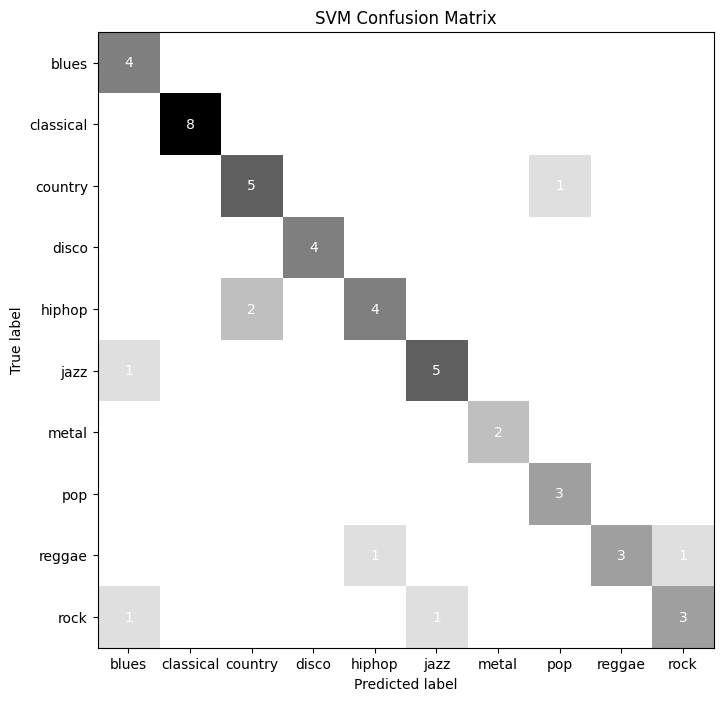

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_preds = pd.DataFrame({'svm': y_pred_svm, 'knn': y_pred_knn, 'lr': y_pred_best_lr})
y_preds = y_preds.to_numpy()

cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='binary')

# Add labels and ticks
ax.set_title('SVM Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(['blues', 'classical', 'country','disco','hiphop','jazz','metal','pop','reggae','rock'])
ax.set_yticklabels(['blues', 'classical', 'country','disco','hiphop','jazz','metal','pop','reggae','rock'])

# Add values inside cells
for i in range(10):
    for j in range(10):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

plt.show()

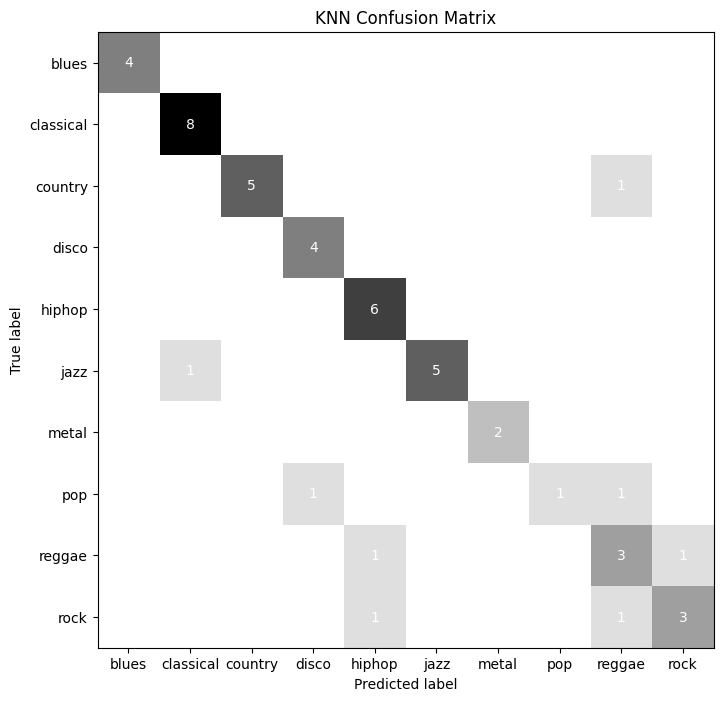

In [ ]:
import pandas as pd
y_preds = pd.DataFrame({'svm': y_pred_svm, 'knn': y_pred_knn, 'lr': y_pred_lr})
y_preds = y_preds.to_numpy()

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='binary')

# Add labels and ticks
ax.set_title('KNN Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(['blues', 'classical', 'country','disco','hiphop','jazz','metal','pop','reggae','rock'])
ax.set_yticklabels(['blues', 'classical', 'country','disco','hiphop','jazz','metal','pop','reggae','rock'])

# Add values inside cells
for i in range(10):
    for j in range(10):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

plt.show()